In [1]:
# This is a code cell
# The famous Hello World program
print('Hello World')

Hello World


# This is a markdown cell

### Hello World
# Hello World
List:
1. e1
2. e2
3. e3

[markdown cheatsheet](http://nestacms.com/docs/creating-content/markdown-cheat-sheet)


[markdown mathematics](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference 'easy access')

# Image in markdown cell
<img src='auto.png'>


In [2]:
# numpy is essential for us
import numpy as np

In [3]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

In [5]:
!ls

Readme.txt           auto.png
Untitled.ipynb       notebook_intro.ipynb


## Magic commands

In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [7]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}


<IPython.core.display.Latex object>

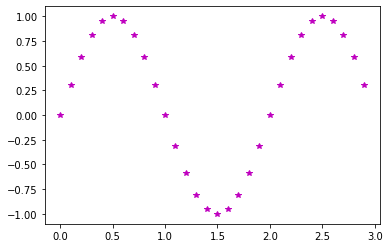

In [13]:
# Most of the plots are produced using the 'inline' mode of matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


t = np.arange(.0, 3., .1)
s = np.sin(np.pi*t)

plt.plot(t,s, 'm*')
#plt.savefig('sin.png')


## Here follows the MNIST example. 

Getting this code to run means that you have all the needed libraries for the computer exercises 


In [16]:
#from warnings import simplefilter
#simplefilter(action='ignore', category=FutureWarning)

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np

batch_size = 128
num_classes = 10
epochs = 10

# Load the MNIST dataset
(x_train, y_trainO), (x_test, y_testO) = mnist.load_data()

# Make the image into a long vector of numbers
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_trainO, num_classes)
y_test = keras.utils.to_categorical(y_testO, num_classes)

# The MLP model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluate the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4819 - accuracy: 0.8660 - val_loss: 0.2533 - val_accuracy: 0.9267
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2334 - accuracy: 0.9333 - val_loss: 0.2036 - val_accuracy: 0.9413
Epoch 3/10
469/469 [==============================] - 1s 

### Run the code below to see some correctly calssified MNIST images together with exampes that are misclassified!


9685  classified correctly
315  classified incorrectly


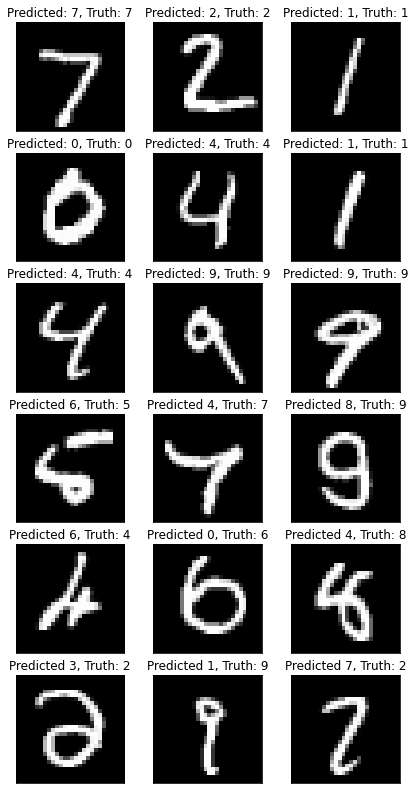

In [17]:
import matplotlib.pyplot as plt

# Some visual feedback

# Make a prediction on the test set
predicted_classes = np.argmax(model.predict(x_test), axis=-1)

# See which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_testO)[0]
incorrect_indices = np.nonzero(predicted_classes != y_testO)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# Plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_testO[correct]))
    plt.xticks([])
    plt.yticks([])

# Plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_testO[incorrect]))
    plt.xticks([])
    plt.yticks([])
